# transpose예제

In [ ]:
a=np.random.rand(2,3)
t1=np.transpose(a)
t2=a.T
print(a.shape)
print(t1.shape)
print(t2.shape)

t2[0,1] = 77
print(a[1,0])
print(t1[0,1])
print(t2[0,1])

(2, 3)
(3, 2)
(3, 2)
77.0
77.0
77.0


In [ ]:
import torch
a_torch = torch.rand(2,3)
print(a_torch)
t1_torch = torch.transpose(a_torch, 0, 1)
t2_torch = a_torch.T
print(a_torch.shape)
print(t1_torch.shape)
print(t2_torch.shape)

t2_torch[0,1] = 77
print(a_torch[1,0])
print(t1_torch[0,1])
print(t2_torch[0,1])

tensor([[0.0879, 0.4686, 0.2884],
        [0.5153, 0.7543, 0.8320]])
torch.Size([2, 3])
torch.Size([3, 2])
torch.Size([3, 2])
tensor(77.)
tensor(77.)
tensor(77.)


In [ ]:
a_torch.is_contiguous()

True

In [ ]:
a_torch.shape

torch.Size([2, 3])

- **permute**-순열, 축의 위치 변경
  - 임의의 수의 축들을 임의의 순서로 자유롭게 변경 가능

In [ ]:
import numpy as np
a=np.random.rand(2,3,4)
t1=np.transpose(a,(0,2,1))
print(a.shape)
print(t1.shape)
t1[0,1,2]=77
print(a[0,2,1])
print(t1[0,1,2])

(2, 3, 4)
(2, 4, 3)
77.0
77.0


In [ ]:
import tensorflow as tf
import numpy as np
a_tf = tf.random.normal([2, 3, 4])
t1_tf = tf.transpose(a_tf, perm=[0, 2, 1])
print(a_tf.shape)
print(t1_tf.shape)

(2, 3, 4)
(2, 4, 3)


In [ ]:
a=np.ones((2,1,3))
b=np.ones((3,1))*2
c=a+b
c.shape


(2, 3, 3)

In [ ]:
np.transpose(a,(0,2,1))

array([[[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]]])

In [ ]:
np.transpose(b,(1,0))

array([[2., 2., 2.]])

# dvice GPU 확인 및 사용

In [ ]:
!nvidia-smi

Wed Apr  3 09:49:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0              26W /  70W |    107MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

True
1
1
0
Tesla T4


In [ ]:
a = torch.tensor([1,2,3])
print(a.device)

cpu


In [ ]:
b=a.cpu()
print(b.is_cpu)

True


In [ ]:
c=a.to(device='cuda:0')
print(c.is_cuda)

True


In [ ]:
for i in (a,b,c):
  print(i.dtype,i)


torch.int64 tensor([1, 2, 3])
torch.int64 tensor([1, 2, 3])
torch.int64 tensor([1, 2, 3], device='cuda:0')


In [ ]:
b[1]=999
print(a)
print(b)
print(c)

tensor([  1, 999,   3])
tensor([  1, 999,   3])
tensor([1, 2, 3], device='cuda:0')


In [ ]:
print(a.untyped_storage().data_ptr())
print(b.untyped_storage().data_ptr())
print(c.untyped_storage().data_ptr())


101309116807616
101309116807616
136741983879168


In [ ]:
d=a.cuda(0)
print(d.is_cuda)

True


In [ ]:
print(a)
print(b)
print(c)
print(d)
d[1]=777

tensor([  1, 999,   3])
tensor([  1, 999,   3])
tensor([1, 2, 3], device='cuda:0')
tensor([  1, 999,   3], device='cuda:0')


In [ ]:
b=a.to("cpu",torch.float)

print(id(a),a)
print(id(b),b)
print(id(c),c)

136744426186656 tensor([  1, 999,   3])
136742765463168 tensor([  1., 999.,   3.])
136748340631792 tensor([1, 2, 3], device='cuda:0')


In [ ]:
b[1]=4

print(a)
print(b)
print(c)

tensor([  1, 999,   3])
tensor([1., 4., 3.])
tensor([1, 2, 3], device='cuda:0')


# Storage: PyTorch 텐서를 위한 메모리 관리

In [ ]:
import torch

x = torch.randn(3,3)

x_storage = x.storage()

print(x.storage)

<bound method Tensor.storage of tensor([[ 0.2359, -1.8609,  0.2126],
        [-0.8458,  0.5130,  1.5436],
        [ 2.0205,  0.1375,  2.4337]])>


<ipython-input-58-a23b520c60b2>:5: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  x_storage = x.storage()


In [ ]:
import torch

a = torch.tensor([range(i,i+3) for i in [0,3,6]])

print(a)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [ ]:
a_sub = a[1:,0]
print(a_sub)

tensor([3, 6])


In [ ]:
print(a.is_contiguous(), a_sub.is_contiguous())

True False


In [ ]:
print(a.storage().data_ptr() == a_sub.storage().data_ptr())

True


In [ ]:
print(id(a.storage()) == id(a_sub.storage()))

False


In [ ]:
print(f"{a.shape=}, {a.size()=}, {a.stride()=}, {a.storage_offset()=}")
print(f"{a_sub.shape=}, {a_sub.size()=}, {a_sub.stride()=}, {a_sub.storage_offset()=}")

a.shape=torch.Size([3, 3]), a.size()=torch.Size([3, 3]), a.stride()=(3, 1), a.storage_offset()=0
a_sub.shape=torch.Size([2]), a_sub.size()=torch.Size([2]), a_sub.stride()=(3,), a_sub.storage_offset()=3


# View 와 Reshape 에서의 underlying data 공유여부
- PyTorch의 Tensor 인스턴스의 shape는 view 나 reshape  메서드를 통해 변경가능한데,

  - view 의 경우, 해당 인스턴스가 contiguous한 경우에만 사용가능함.

- Transpose와 Permute 에서의 underlying data 공유여부
  - Transpose와 Permute를 통해 얻어진 인스턴스에서는 contiguous는 깨지게 된다.





## PyTorch: Autograd (Basic)




1. requires_grad
2. backward()
3. .grad
4. .grad.zeros_()

In [ ]:
!pip install --quiet torchviz

In [ ]:
import numpy as np
import torch


from IPython.display import display
from torchviz import make_dot

for c in [np,torch]:
  print(c.__name__,c.__version__)


numpy 1.25.2
torch 2.2.1+cu121


In [ ]:
x_np=np.arange(-1,1,0.5)

x=torch.tensor(x_np,dtype=torch.float32)
x.requires_grad=True

display(x)

y = 3 * x + 10

display(y)

tensor([-1.0000, -0.5000,  0.0000,  0.5000], requires_grad=True)

tensor([ 7.0000,  8.5000, 10.0000, 11.5000], grad_fn=<AddBackward0>)

### 1. requires_grad 를 True로 설정.

- 편미분을 구할 Tensor 인스턴스에 대해 requires_grad=True 가 되도록하여,

해당 Tensor 인스턴스에 대한 연산을 추적하고, 자동으로 gradient를 계산할 수 있도록 수행.

- x.requires_grad :
grad 를 구하기위해 forward propagation에서
gradient를 구하기 위해 필요한 연산 및 중간값을 추적하여 기록할지 여부를 나타냄

- x.is_leaf:
계산 그래프에서 “leaf node"인지 여부를 나타냄.
leaf node는 다른 tensor를 기반으로하는 어떤 연산을 통해 생성되지 않은 tensor로서 직접적으로 생성한 것들임.
만약 tensor 가 다른 tensor로부터 어떤 연산을 통해 생성되었다면, is_leaf 속성은 False임.

- x.grad_fn:
텐서가 다른 텐서들의 연산을 통해 생성된 경우(=leaf node가 아닌 경우),
grad_fn은 해당 연산을 나타내며,
이 정보를 통해 back-propagation 에서 gradient를 계산할 때 어떤 연산을 통해 편미분을 계산하는지 알 수 있음.


- x.grad:
tensor 인스턴스 x 에 대해 수행된 마지막 .backward() 연산으로부터 계산된 gradient가 저장됨.
x의 requires_grad = True일 때,
PyTorch는 x에 대한 모든 연산을 추적하며
.backward()가 호출될 때 자동으로 gradient를 계산하여 x.grad에 저장

- 만약 x가 scalar가 아닌 경우, .backward() 호출 시 gradient의 shape를 지정하는 argument를 전달해야함
(.backward()를 호출하는 tensor와 같은 shape 이며 각 요소로 scalar 1을 가지는 tensor 인스턴스가 주로 argument로 사용됨.)

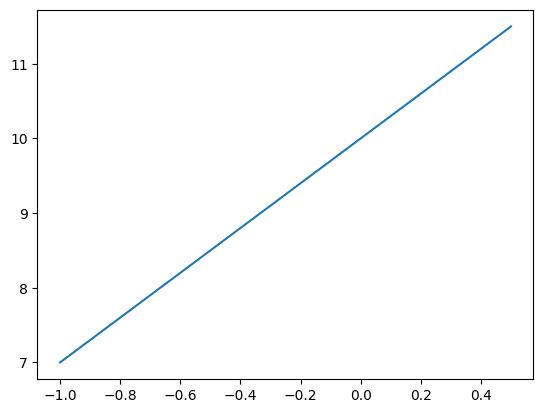

In [ ]:

import matplotlib.pyplot as pit
pit.plot(
    x.detach().numpy(),
    y.detach().numpy()
)


In [ ]:
import numpy as np

y.backward(torch.ones_like(y),retain_graph=True)
display(x.grad)

# 다시 backward를 하기 전 꼭 초기화할것.
# 안하면 누적되기 때문임.
# 우선 누적되는 여부를 보기 위해 주석처리가 되어 있음.
#x.grad.zero_() #inplace op.

tensor([5., 5., 5., 5.])

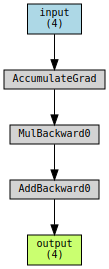

In [ ]:
cg=make_dot(y, params={"input":x, "output":y})

cg.render("graph",view=True)
display(cg)

In [ ]:
#grad를 초기화하지 않고 다른 loss에서의 grad 계산을 수행시
y2=2*x
y2.backward(torch.ones_like(y2))
display(x.grad) #앞서의 3과 현재의 2가 더해져 5로 나옴.

tensor([7., 7., 7., 7.])

- * 초기화를 꼭 해주어야 함


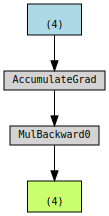

In [ ]:
cg=make_dot(y2)
display(cg)

*아래 코딩을 가장 중요한 부분 다시 해보기

In [ ]:
import torch





In [ ]:
x = torch.tensor([2.0], requires_grad=True)

In [ ]:
x.requires_grad



True

In [ ]:

def print_ten(x):
  print(f'{x.requires_grad=}\n{x.is_leaf=}\n{x.grad_fn=}\n{x.grad=}')

print_ten(x)

x.requires_grad=True
x.is_leaf=True
x.grad_fn=None
x.grad=None


In [ ]:
a = 2*x +10
a.retain_grad()

b = 3*a
b.retain_grad()

c = 2*b
c.retain_grad()

l=torch.sum(c)
display(x)
display(l)


tensor([2.], requires_grad=True)

tensor(84., grad_fn=<SumBackward0>)

In [ ]:

l.backward()

for c in [x,a,b,c]:
  print_ten(c)
  print('-----------')
  c.grad.zero_()


x.requires_grad=True
x.is_leaf=True
x.grad_fn=None
x.grad=tensor([12.])
-----------
x.requires_grad=True
x.is_leaf=False
x.grad_fn=<AddBackward0 object at 0x7ad92fdb2380>
x.grad=tensor([6.])
-----------
x.requires_grad=True
x.is_leaf=False
x.grad_fn=<MulBackward0 object at 0x7ad85c209780>
x.grad=tensor([2.])
-----------
x.requires_grad=True
x.is_leaf=False
x.grad_fn=<MulBackward0 object at 0x7ad85c209270>
x.grad=tensor([1.])
-----------


In [ ]:

c.backward( torch.ones(c.shape) )
print(x.grad)
?

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.